To determine whether there are neurons that have not been identified as clock neurons in the hemibrain dataset but that are nonetheless central players in the clock network, we focused on the strongest shared targets of the M and E cells.

In [1]:
from neuprint import Client
c = Client('neuprint.janelia.org', dataset='hemibrain:v1.2.1', token='')
# insert personal token above. see https://connectome-neuprint.github.io/neuprint-python/docs/quickstart.html#client-and-authorization-token for instructions

# Strongest shared M cell targets

Strong connections made by all of the M cells were retrieved. 

There were 6 neurons that received strong synaptic connections from all 4 M cells.

In [2]:
import neuron_criteria

clock_df = neuron_criteria.getClock(l_lnv = True)
bodyIds_by_type = neuron_criteria.bodyIds_by_type(clock_df)
MIds = bodyIds_by_type['s-LNv']

In [3]:
from connection_utils import strong_shared_connections

sLNv_strong_shared_targs = strong_shared_connections(MIds, 'out', 4)

candidate_IDs =  sLNv_strong_shared_targs['bodyId_post']
candidate_IDs

C:\Users\dbing\Documents\Research\Code\clock-connectome\connection_utils.py:208: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  conns_df = conns_df.groupby(['bodyId_post', 'instance_post'], as_index=False)['weight', 'shared'].sum()


3     355453590
9    5813047586
1     325122525
2     325455002
0     294783216
5     540998882
Name: bodyId_post, dtype: int64

Retrieve connectivity for clock and candidates

In [4]:
from connection_utils import clock_neuron_connections, get_input_output_conns
import pandas as pd

clock_targets = clock_neuron_connections(clock_df, 'out', min_weight=3)

In [5]:
candidate_targets = get_input_output_conns(candidate_IDs, 'out', min_strength = 3)
conn_df = pd.concat([clock_targets, candidate_targets])
conn_df

,bodyId_pre,bodyId_post,weight,instance_pre,instance_post
0,264083994,299272434,4,DN1a1,SLP443
1,264083994,325814461,10,DN1a1,LHPV4c3
2,264083994,326119769,4,DN1a1,SLP457
3,264083994,356472645,3,DN1a1,SLP364
4,264083994,356503889,7,DN1a1,LHPV6f4_b
...,...,...,...,...,...
215,325122525,5813046962,3,SLP316_R,SLP296_R
216,325122525,5813057148,3,SLP316_R,SLP387_R
113,294783216,387166379,6,SLP403_R,DN1pA_R
191,294783216,324846570,3,SLP403_R,DN1pA_R


In [6]:
#export table
conn_df.to_csv('clock_slnv_cand_targets.csv')

To determine whether these 6 neurons had similar patterns of connectivity to any of the other identified clock neurons, jaccard indices were computed between the 6 candidates and the identified clock neurons.

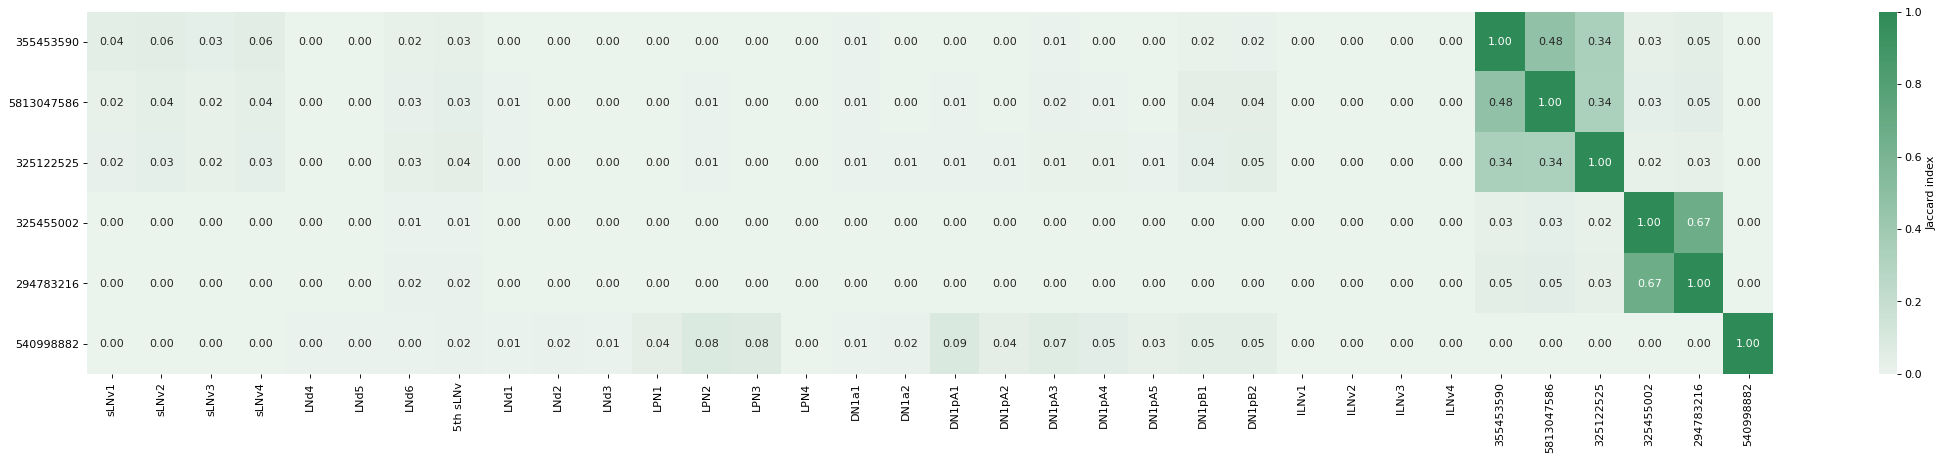

In [7]:
from visualization_utils import jaccard_vis

candidate_jaccard_out, fig = jaccard_vis(conn_df, clock_df, clock_df['bodyId'], 'out', other_body_ids = candidate_IDs)

To compare the output partners among the candidates only, we compute the jaccard index and plot.

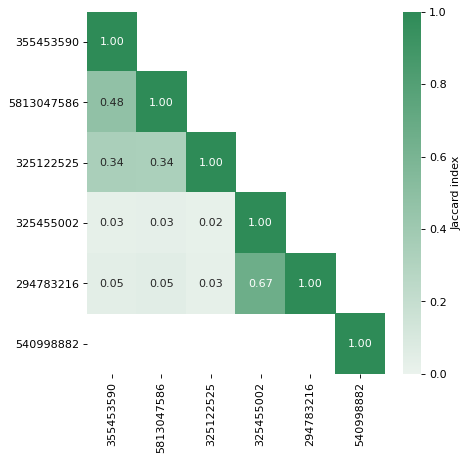

In [8]:
from visualization_utils import jaccard_simple
candidate_jac_out, fig = jaccard_simple(candidate_IDs, candidate_IDs, 'out', diag_mask=True)

In [9]:
# save figure
fig.savefig('jaccard_M_target_outputs.svg')

The strong shared targets of M that return to the clock (with medium or strong connections) are found below. 

In [10]:
# get connections from strong shared targets of M to clock neurons
all_candidate_IDs = sLNv_strong_shared_targs['bodyId_post']
all_candidate_targets = get_input_output_conns(all_candidate_IDs, 'out', min_strength = 3)
all_candidate_targets = all_candidate_targets[all_candidate_targets.bodyId_post.isin(clock_df['bodyId'])]

In [11]:
import re

# merge clock labels onto all_candidate_targets
all_candidate_targets = all_candidate_targets.merge(clock_df[['bodyId','labels']], left_on='bodyId_post', right_on='bodyId')
#remove parenthetical addendums to target instance names
all_candidate_targets['instance_pre'] = all_candidate_targets['instance_pre'].str.replace(r'\([^()]*\)', '')
# remove _L and _R from candidate target instance names
all_candidate_targets['instance_pre'] = [re.sub(r'_(L|R)','',str(x)) for x in all_candidate_targets['instance_pre']]
# drop extra bodyId column
all_candidate_targets = all_candidate_targets.drop(columns='bodyId')

<ipython-input-11-819992679692>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  all_candidate_targets['instance_pre'] = all_candidate_targets['instance_pre'].str.replace(r'\([^()]*\)', '')


In [12]:
# just to see the cell types of the candidates
all_candidate_targets.sort_values(by='instance_pre')

,bodyId_pre,instance_pre,bodyId_post,instance_post,weight,labels
0,5813047586,SLP316,325529237,DN1pA_R,20,DN1pA3
20,5813047586,SLP316,5813071319,DN1pB_R,4,DN1pB2
19,325122525,SLP316,387944118,DN1pA_R,10,DN1pA4
18,355453590,SLP316,387944118,DN1pA_R,15,DN1pA4
17,5813047586,SLP316,387944118,DN1pA_R,4,DN1pA4
15,325122525,SLP316,324846570,DN1pA_R,32,DN1pA2
13,355453590,SLP316,324846570,DN1pA_R,15,DN1pA2
10,325122525,SLP316,387166379,DN1pA_R,20,DN1pA5
12,5813047586,SLP316,324846570,DN1pA_R,5,DN1pA2
4,5813047586,SLP316,5813010153,DN1pA_R,11,DN1pA1


In [13]:
# recreate labels for candidates to include type and bodyId
all_candidate_targets['candidate_label'] = all_candidate_targets['instance_pre'] + ' (' + all_candidate_targets['bodyId_pre'].map(str) + ')'
all_candidate_targets.sort_values(by='candidate_label')

,bodyId_pre,instance_pre,bodyId_post,instance_post,weight,labels,candidate_label
2,325122525,SLP316,325529237,DN1pA_R,21,DN1pA3,SLP316 (325122525)
19,325122525,SLP316,387944118,DN1pA_R,10,DN1pA4,SLP316 (325122525)
6,325122525,SLP316,5813010153,DN1pA_R,19,DN1pA1,SLP316 (325122525)
10,325122525,SLP316,387166379,DN1pA_R,20,DN1pA5,SLP316 (325122525)
15,325122525,SLP316,324846570,DN1pA_R,32,DN1pA2,SLP316 (325122525)
25,355453590,SLP316,2007068523,s-LNv,3,sLNv3,SLP316 (355453590)
1,355453590,SLP316,325529237,DN1pA_R,26,DN1pA3,SLP316 (355453590)
5,355453590,SLP316,5813010153,DN1pA_R,7,DN1pA1,SLP316 (355453590)
18,355453590,SLP316,387944118,DN1pA_R,15,DN1pA4,SLP316 (355453590)
8,355453590,SLP316,387166379,DN1pA_R,13,DN1pA5,SLP316 (355453590)


In [14]:
# generate pivot table for strong shared targets back to clock
all_candidate_targets = all_candidate_targets.pivot(index='candidate_label', columns='labels', values='weight')
all_candidate_targets

labels,DN1a1,DN1pA1,DN1pA2,DN1pA3,DN1pA4,DN1pA5,DN1pB2,LPN1,LPN2,LPN3,sLNv3
candidate_label,,,,,,,,,,,
SLP316 (325122525),NaN,19.0,32.0,21.0,10.0,20.0,NaN,NaN,NaN,NaN,NaN
SLP316 (355453590),NaN,7.0,15.0,26.0,15.0,13.0,NaN,NaN,NaN,NaN,3.0
SLP316 (5813047586),NaN,11.0,5.0,20.0,4.0,10.0,4.0,NaN,NaN,NaN,NaN
SLP403 (294783216),NaN,NaN,3.0,3.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN
SLP403 (325455002),NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
SMP232 (540998882),3.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,12.0,19.0,NaN


In [15]:
# export table
all_candidate_targets.to_csv('M_targets_to_clock.csv')

# Strongest shared E cells targets

For each of the subgroups of evening cells, the strongest targets shared by the entire group were extracted.

In [16]:
E1Ids = clock_df[clock_df['subphase']=='E1']['bodyId']

The top 10 targets were then explored to get a lay of their similarity to the existing clock network even though there were more than 10 strong shared targets in some cases (for example, for E1).

In [17]:
Evening1_targs = strong_shared_connections(E1Ids, 'out', 2)

candidate_IDs = Evening1_targs['bodyId_post'][0:10]
candidate_IDs

C:\Users\dbing\Documents\Research\Code\clock-connectome\connection_utils.py:208: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  conns_df = conns_df.groupby(['bodyId_post', 'instance_post'], as_index=False)['weight', 'shared'].sum()


5      329732855
42     670431030
43     670772147
50     702152113
10     390331583
77    5813040712
40     668384542
81    5813111989
56     731140809
82    5901196628
Name: bodyId_post, dtype: int64

In [18]:
candidate_targets = get_input_output_conns(candidate_IDs, 'out', min_strength = 3)

In [19]:
conn_df = pd.concat([clock_targets, candidate_targets])
conn_df

,bodyId_pre,bodyId_post,weight,instance_pre,instance_post
0,264083994,299272434,4,DN1a1,SLP443
1,264083994,325814461,10,DN1a1,LHPV4c3
2,264083994,326119769,4,DN1a1,SLP457
3,264083994,356472645,3,DN1a1,SLP364
4,264083994,356503889,7,DN1a1,LHPV6f4_b
...,...,...,...,...,...
833,329732855,1036637638,3,SMP368(PDM08)_L,ExR3(ring)_R
834,329732855,5813002813,3,SMP368(PDM08)_L,None
835,329732855,5813020676,3,SMP368(PDM08)_L,SMP182_R
836,329732855,5813020817,3,SMP368(PDM08)_L,SMP190_R


In [20]:
conn_df.to_csv('clock_e1_cand_targets.csv')

To determine whether these 10 neurons had similar patterns of connectivity to any of the other identified clock neurons, jaccard indices were computed between the top 10 strongest shared candidates and the identified clock neurons.

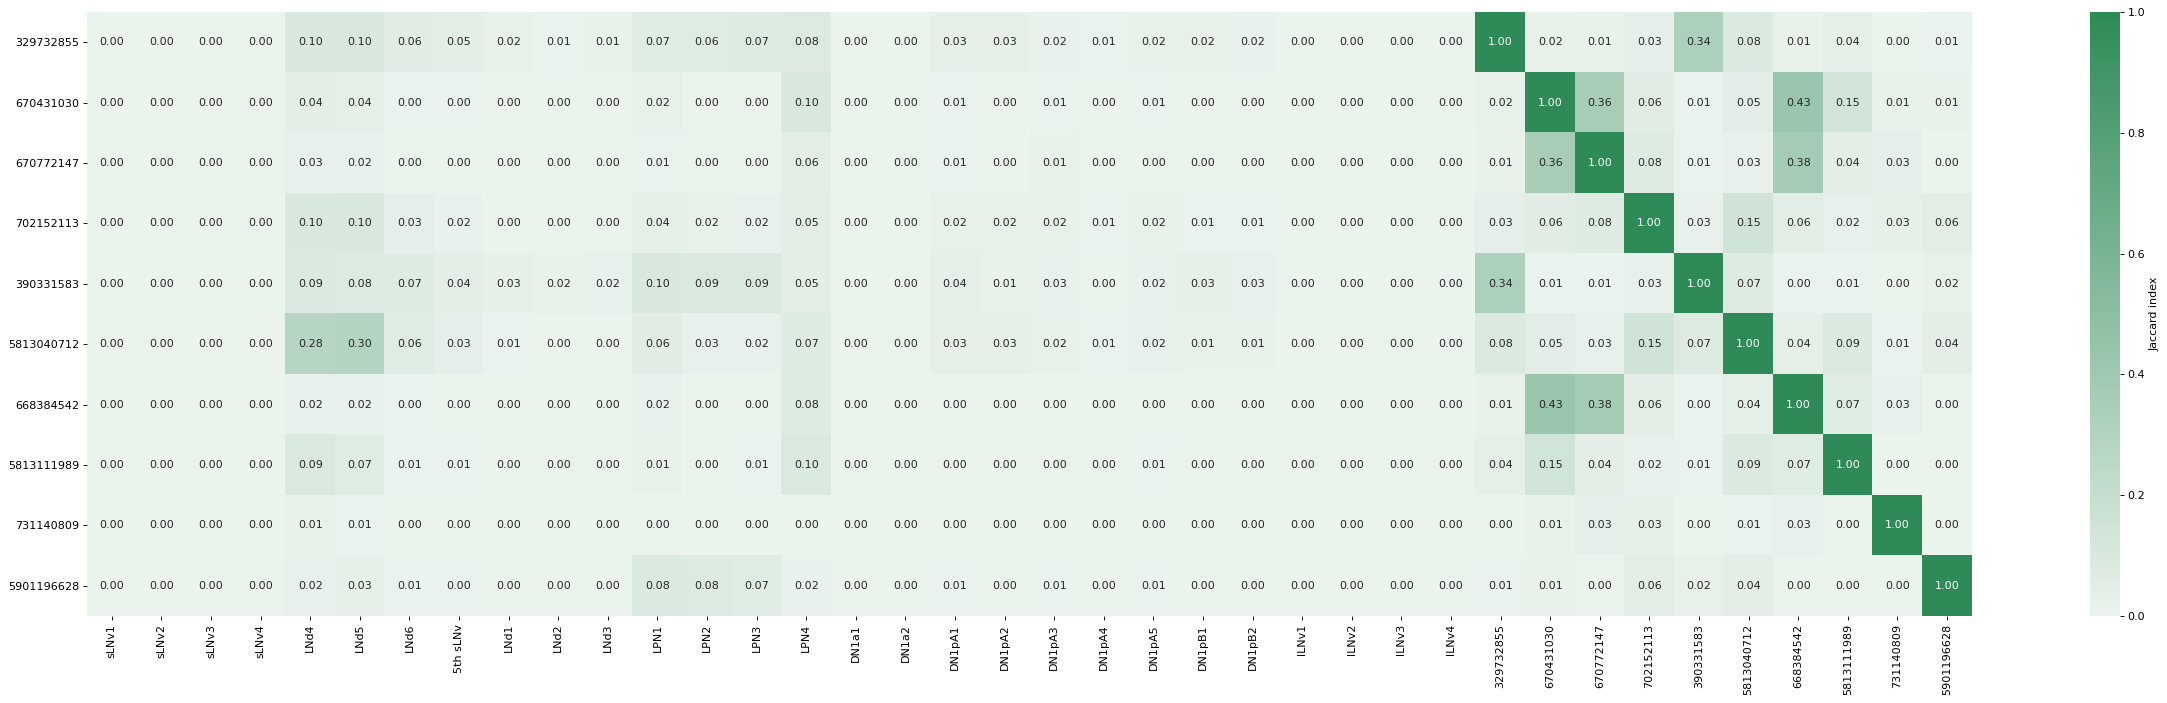

In [21]:
candidate_jaccard_out = jaccard_vis(conn_df, clock_df, clock_df['bodyId'], 'out', other_body_ids = candidate_IDs)

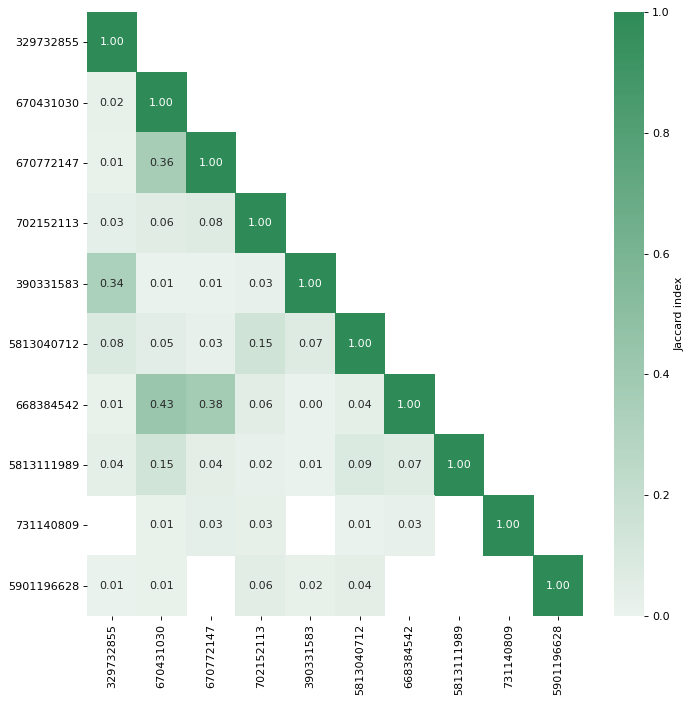

In [22]:
from visualization_utils import jaccard_simple
candidate_jac_out, fig = jaccard_simple(candidate_IDs, candidate_IDs, 'out', diag_mask=True)

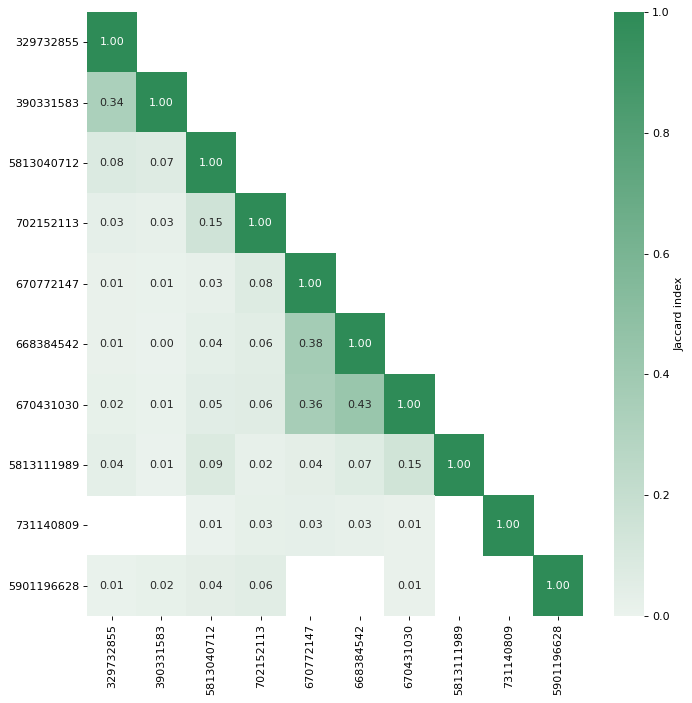

In [23]:
# clustering by hand
candidate_IDs = candidate_IDs.reset_index(drop=True)
clustered_Ids = candidate_IDs[[0,4,5,3,2,6,1,7,8,9]]

from visualization_utils import jaccard_simple
candidate_jac_out, fig = jaccard_simple(clustered_Ids, clustered_Ids, 'out', diag_mask=True)

In [24]:
# save figure
fig.savefig('jaccard_E1_target_outputs.svg')

The strong shared targets of E1 that return to the clock (with medium or strong connections) are found below. 

In [25]:
# get connections from strong shared targets of E1 to clock neurons
all_candidate_IDs = Evening1_targs['bodyId_post']
all_candidate_targets = get_input_output_conns(all_candidate_IDs, 'out', min_strength = 3)
all_candidate_targets = all_candidate_targets[all_candidate_targets.bodyId_post.isin(clock_df['bodyId'])]

In [26]:
# merge clock labels onto all_candidate_targets
all_candidate_targets = all_candidate_targets.merge(clock_df[['bodyId','labels']], left_on='bodyId_post', right_on='bodyId')
#remove parenthetical addendums to target instance names
all_candidate_targets['instance_pre'] = all_candidate_targets['instance_pre'].str.replace(r'\([^()]*\)', '')
# remove _L and _R from candidate target instance names
all_candidate_targets['instance_pre'] = [re.sub(r'_(L|R)','',str(x)) for x in all_candidate_targets['instance_pre']]
# drop extra bodyId column
all_candidate_targets = all_candidate_targets.drop(columns='bodyId')

<ipython-input-26-c14192aa3d57>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  all_candidate_targets['instance_pre'] = all_candidate_targets['instance_pre'].str.replace(r'\([^()]*\)', '')


In [27]:
# just to see the cell types of the candidates
all_candidate_targets.sort_values(by='instance_pre')

,bodyId_pre,instance_pre,bodyId_post,instance_post,weight,labels
3,702152113,AVLP075,5813021192,LNd_R,10,LNd5
18,674108632,AVLP075,5813056917,LNd_R,12,LNd4
5,674108632,AVLP075,5813021192,LNd_R,15,LNd5
16,702152113,AVLP075,5813056917,LNd_R,11,LNd4
32,1072063538,DNp27,511051477,5th s-LNv,3,5th sLNv
31,1072063538,DNp27,5813069648,LNd_R,5,LNd6
34,388881226,LHPV6m1,5813022274,DN1a_R,10,DN1a2
33,388881226,LHPV6m1,264083994,DN1a_R,19,DN1a1
0,5813111989,None,546977514,LPN(PDL18)_L,3,LPN4
2,5813026589,SMP082,5813021192,LNd_R,23,LNd5


In [28]:
# recreate labels for candidates to include type and bodyId
all_candidate_targets['candidate_label'] = all_candidate_targets['instance_pre'] + ' (' + all_candidate_targets['bodyId_pre'].map(str) + ')'
all_candidate_targets.sort_values(by='candidate_label')

,bodyId_pre,instance_pre,bodyId_post,instance_post,weight,labels,candidate_label
18,674108632,AVLP075,5813056917,LNd_R,12,LNd4,AVLP075 (674108632)
5,674108632,AVLP075,5813021192,LNd_R,15,LNd5,AVLP075 (674108632)
3,702152113,AVLP075,5813021192,LNd_R,10,LNd5,AVLP075 (702152113)
16,702152113,AVLP075,5813056917,LNd_R,11,LNd4,AVLP075 (702152113)
32,1072063538,DNp27,511051477,5th s-LNv,3,5th sLNv,DNp27 (1072063538)
31,1072063538,DNp27,5813069648,LNd_R,5,LNd6,DNp27 (1072063538)
34,388881226,LHPV6m1,5813022274,DN1a_R,10,DN1a2,LHPV6m1 (388881226)
33,388881226,LHPV6m1,264083994,DN1a_R,19,DN1a1,LHPV6m1 (388881226)
0,5813111989,None,546977514,LPN(PDL18)_L,3,LPN4,None (5813111989)
13,298254517,SMP082,5813021192,LNd_R,13,LNd5,SMP082 (298254517)


In [29]:
# generate pivot table for strong shared targets back to clock
all_candidate_targets = all_candidate_targets.pivot(index='candidate_label', columns='labels', values='weight')
all_candidate_targets

labels,5th sLNv,DN1a1,DN1a2,LNd4,LNd5,LNd6,LPN2,LPN3,LPN4
candidate_label,,,,,,,,,
AVLP075 (674108632),NaN,NaN,NaN,12.0,15.0,NaN,NaN,NaN,NaN
AVLP075 (702152113),NaN,NaN,NaN,11.0,10.0,NaN,NaN,NaN,NaN
DNp27 (1072063538),3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
LHPV6m1 (388881226),NaN,19.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
None (5813111989),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
SMP082 (298254517),NaN,NaN,NaN,15.0,13.0,NaN,10.0,10.0,NaN
SMP082 (5813026589),NaN,NaN,NaN,23.0,23.0,NaN,12.0,14.0,NaN
SMP368 (329732855),NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN
SMP368 (390331583),NaN,NaN,NaN,7.0,7.0,NaN,NaN,NaN,NaN


In [30]:
# export table
all_candidate_targets.to_csv('E1_targets_to_clock.csv')

E2 also had more than 10 strong shared targets, but here we focused on the connectivity patterns of the top 10.

In [31]:
E2Ids = clock_df[clock_df['subphase']=='E2']['bodyId']
Evening2_targs = strong_shared_connections(E2Ids, 'out', 2)

candidate_IDs = Evening2_targs['bodyId_post'][0:10]
candidate_IDs

C:\Users\dbing\Documents\Research\Code\clock-connectome\connection_utils.py:208: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  conns_df = conns_df.groupby(['bodyId_post', 'instance_post'], as_index=False)['weight', 'shared'].sum()


15     390331583
59    5813021666
5      329732855
2      327588446
23     421068062
6      356140100
18     417143726
27     451148838
64    5813057153
63    5813056917
Name: bodyId_post, dtype: int64

In [32]:
candidate_targets = get_input_output_conns(candidate_IDs, 'out', min_strength = 3)
conn_df = pd.concat([clock_targets, candidate_targets])
conn_df

,bodyId_pre,bodyId_post,weight,instance_pre,instance_post
0,264083994,299272434,4,DN1a1,SLP443
1,264083994,325814461,10,DN1a1,LHPV4c3
2,264083994,326119769,4,DN1a1,SLP457
3,264083994,356472645,3,DN1a1,SLP364
4,264083994,356503889,7,DN1a1,LHPV6f4_b
...,...,...,...,...,...
924,327588446,951446091,3,SMP162_R,None
925,327588446,954161608,3,SMP162_R,None
926,327588446,1018273031,3,SMP162_R,None
927,327588446,5813060768,3,SMP162_R,SMP600(SCB077)_R


In [33]:
# export table
conn_df.to_csv('clock_e2_cand_targets.csv')

To determine whether these 10 neurons had similar patterns of connectivity to any of the other identified clock neurons, jaccard indices were computed between the top 10 strongest shared candidates and the identified clock neurons.

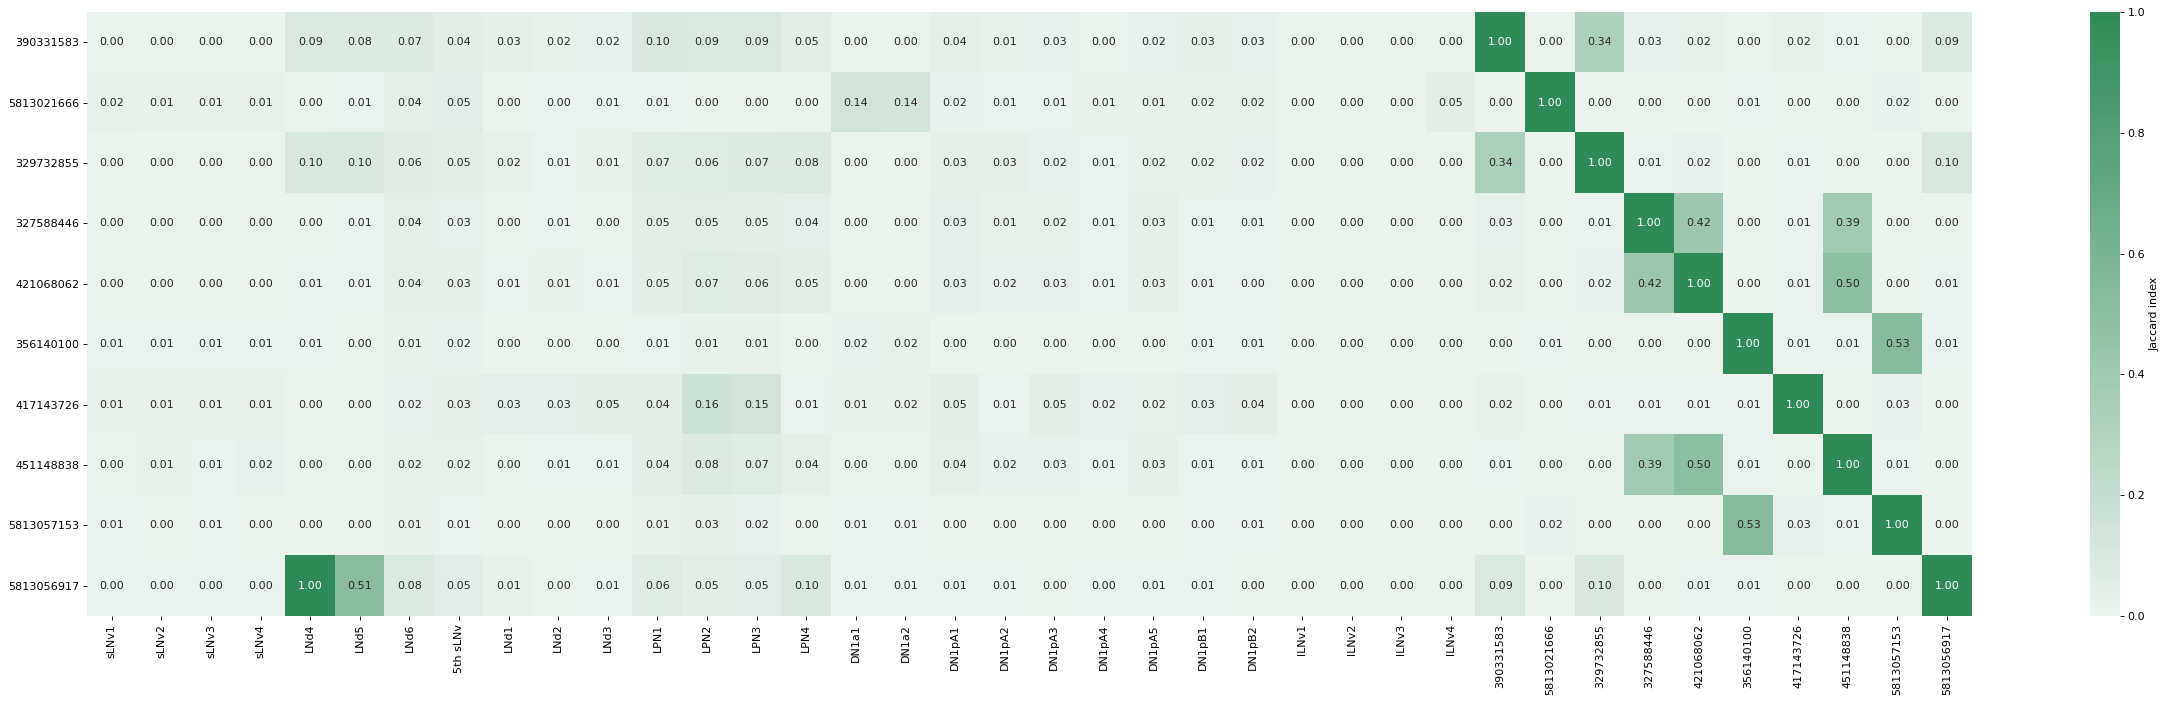

In [34]:
candidate_jaccard_out = jaccard_vis(conn_df, clock_df, clock_df['bodyId'], 'out', other_body_ids = candidate_IDs)

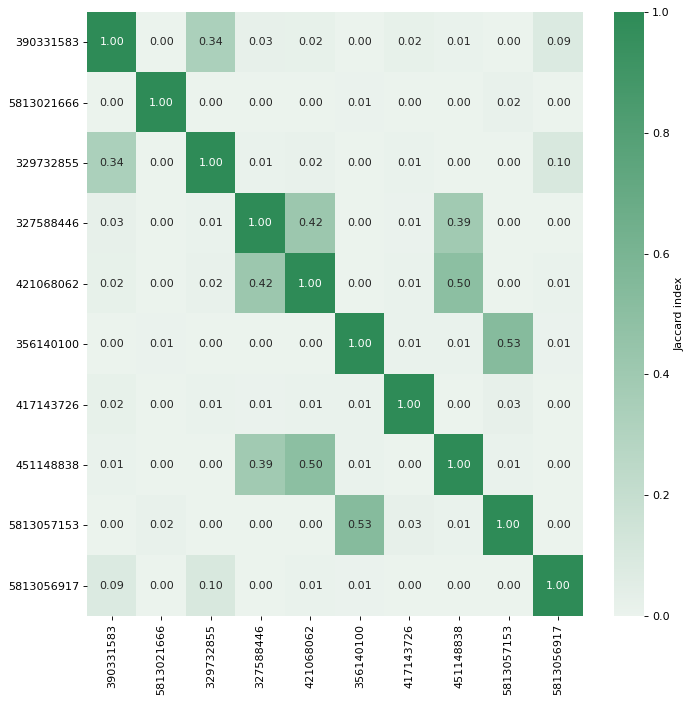

In [35]:
from visualization_utils import jaccard_simple
candidate_jac_out, fig = jaccard_simple(candidate_IDs, candidate_IDs, 'out', diag_mask=False)

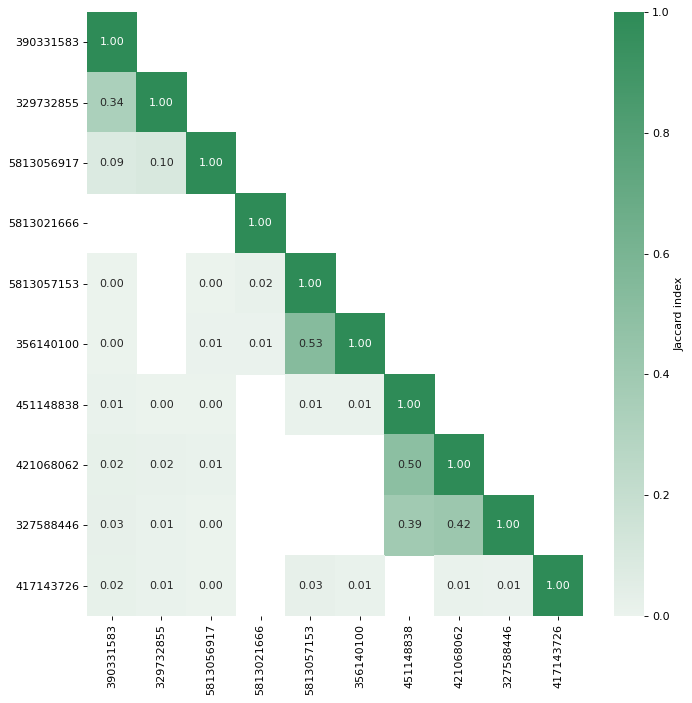

In [36]:
# clustering by hand
candidate_IDs = candidate_IDs.reset_index(drop=True)
clustered_Ids = candidate_IDs[[0,2,9,1,8,5,7,4,3,6]]

from visualization_utils import jaccard_simple
candidate_jac_out, fig = jaccard_simple(clustered_Ids, clustered_Ids, 'out', diag_mask=True)

In [37]:
# save figure
fig.savefig('jaccard_E2_target_outputs.svg')

The strong shared targets of E2 that return to the clock (with medium or strong connections) are found below. 

In [38]:
# get connections from strong shared targets of E2 to clock neurons
all_candidate_IDs = Evening2_targs['bodyId_post']
all_candidate_targets = get_input_output_conns(all_candidate_IDs, 'out', min_strength = 3)
all_candidate_targets = all_candidate_targets[all_candidate_targets.bodyId_post.isin(clock_df['bodyId'])]

In [39]:
import re

# merge clock labels onto all_candidate_targets
all_candidate_targets = all_candidate_targets.merge(clock_df[['bodyId','labels']], left_on='bodyId_post', right_on='bodyId')
#remove parenthetical addendums to target instance names
all_candidate_targets['instance_pre'] = all_candidate_targets['instance_pre'].str.replace(r'\([^()]*\)', '')
# remove _L and _R from candidate target instance names
all_candidate_targets['instance_pre'] = [re.sub(r'_(L|R)','',str(x)) for x in all_candidate_targets['instance_pre']]
# drop extra bodyId column
all_candidate_targets = all_candidate_targets.drop(columns='bodyId')

<ipython-input-39-819992679692>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  all_candidate_targets['instance_pre'] = all_candidate_targets['instance_pre'].str.replace(r'\([^()]*\)', '')


In [40]:
# just to see the cell types of the candidates
all_candidate_targets.sort_values(by='instance_pre')

,bodyId_pre,instance_pre,bodyId_post,instance_post,weight,labels
25,325529237,DN1pA,5813069648,LNd_R,30,LNd6
49,387166379,DN1pA,5813021192,LNd_R,5,LNd5
41,325529237,DN1pA,5813056917,LNd_R,5,LNd4
39,387166379,DN1pA,5813056917,LNd_R,8,LNd4
36,325529237,DN1pA,511051477,5th s-LNv,33,5th sLNv
35,387166379,DN1pA,511051477,5th s-LNv,25,5th sLNv
24,387166379,DN1pA,5813069648,LNd_R,30,LNd6
51,325529237,DN1pA,5813021192,LNd_R,8,LNd5
37,5813021192,LNd,5813056917,LNd_R,5,LNd4
45,420027427,SMP219,5813064789,LNd_R,3,LNd3


In [41]:
# recreate labels for candidates to include type and bodyId
all_candidate_targets['candidate_label'] = all_candidate_targets['instance_pre'] + ' (' + all_candidate_targets['bodyId_pre'].map(str) + ')'
all_candidate_targets.sort_values(by='candidate_label')

,bodyId_pre,instance_pre,bodyId_post,instance_post,weight,labels,candidate_label
25,325529237,DN1pA,5813069648,LNd_R,30,LNd6,DN1pA (325529237)
41,325529237,DN1pA,5813056917,LNd_R,5,LNd4,DN1pA (325529237)
36,325529237,DN1pA,511051477,5th s-LNv,33,5th sLNv,DN1pA (325529237)
51,325529237,DN1pA,5813021192,LNd_R,8,LNd5,DN1pA (325529237)
24,387166379,DN1pA,5813069648,LNd_R,30,LNd6,DN1pA (387166379)
49,387166379,DN1pA,5813021192,LNd_R,5,LNd5,DN1pA (387166379)
35,387166379,DN1pA,511051477,5th s-LNv,25,5th sLNv,DN1pA (387166379)
39,387166379,DN1pA,5813056917,LNd_R,8,LNd4,DN1pA (387166379)
37,5813021192,LNd,5813056917,LNd_R,5,LNd4,LNd (5813021192)
45,420027427,SMP219,5813064789,LNd_R,3,LNd3,SMP219 (420027427)


In [42]:
# generate pivot table for strong shared targets back to clock
all_candidate_targets = all_candidate_targets.pivot(index='candidate_label', columns='labels', values='weight')
all_candidate_targets

labels,5th sLNv,DN1pA1,DN1pA5,DN1pB1,DN1pB2,LNd3,LNd4,LNd5,LNd6,LPN1,LPN2,LPN3,lLNv1,lLNv2,lLNv3,lLNv4,sLNv1,sLNv2,sLNv3,sLNv4
candidate_label,,,,,,,,,,,,,,,,,,,,
DN1pA (325529237),33.0,NaN,NaN,NaN,NaN,NaN,5.0,8.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DN1pA (387166379),25.0,NaN,NaN,NaN,NaN,NaN,8.0,5.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LNd (5813021192),NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMP219 (420027427),NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMP222 (357949102),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMP223 (417143726),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,18.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMP223 (449335798),NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMP223 (540325242),NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMP223 (5813087531),NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# export table
all_candidate_targets.to_csv('E2_targets_to_clock.csv')

However, E3 looks a little different. There are only three neurons that are shared by all three of the E3s! However, knowing that the LNds as a larger group are fairly un-uniform anyway, we wanted to know more about shared targets even if they weren't shared by all of E3, so sharing from any 2 was considered sufficient.

In [44]:
E3Ids = clock_df[clock_df['subphase']=='E3']['bodyId']
Evening3_targs = strong_shared_connections(E3Ids, 'out', 3)
Evening3_targs

C:\Users\dbing\Documents\Research\Code\clock-connectome\connection_utils.py:208: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  conns_df = conns_df.groupby(['bodyId_post', 'instance_post'], as_index=False)['weight', 'shared'].sum()


,bodyId_post,instance_post,weight,shared
5,297243542,SMP335_R,75,3
30,360254108,SMP334_R,42,3
24,327933679,SMP486_c_R,35,3


In [45]:
E3Ids = clock_df[clock_df['subphase']=='E3']['bodyId']
Evening3_targs = strong_shared_connections(E3Ids, 'out', 2)
Evening3_targs

candidate_IDs = Evening3_targs['bodyId_post'][0:10]
candidate_IDs

C:\Users\dbing\Documents\Research\Code\clock-connectome\connection_utils.py:208: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  conns_df = conns_df.groupby(['bodyId_post', 'instance_post'], as_index=False)['weight', 'shared'].sum()


5      297243542
42    5813039910
20     327587644
30     360254108
24     327933679
14     298279629
25     327937494
44    5813092319
13     298266950
26     328273806
Name: bodyId_post, dtype: int64

In [46]:
candidate_targets = get_input_output_conns(candidate_IDs, 'out', min_strength = 3)
conn_df = pd.concat([clock_targets, candidate_targets])
conn_df

,bodyId_pre,bodyId_post,weight,instance_pre,instance_post
0,264083994,299272434,4,DN1a1,SLP443
1,264083994,325814461,10,DN1a1,LHPV4c3
2,264083994,326119769,4,DN1a1,SLP457
3,264083994,356472645,3,DN1a1,SLP364
4,264083994,356503889,7,DN1a1,LHPV6f4_b
...,...,...,...,...,...
557,297243542,571709547,3,SMP335_R,SMP233_R
558,297243542,5813056917,3,SMP335_R,LNd_R
559,297243542,5813064828,3,SMP335_R,SMP349_R
560,297243542,5813067452,3,SMP335_R,SMP509_R


In [47]:
# export table
conn_df.to_csv('clock_e3_cand_targets.csv')

To determine whether these 10 neurons had similar patterns of connectivity to any of the other identified clock neurons, jaccard indices were computed between the top 10 strongest shared candidates and the identified clock neurons.

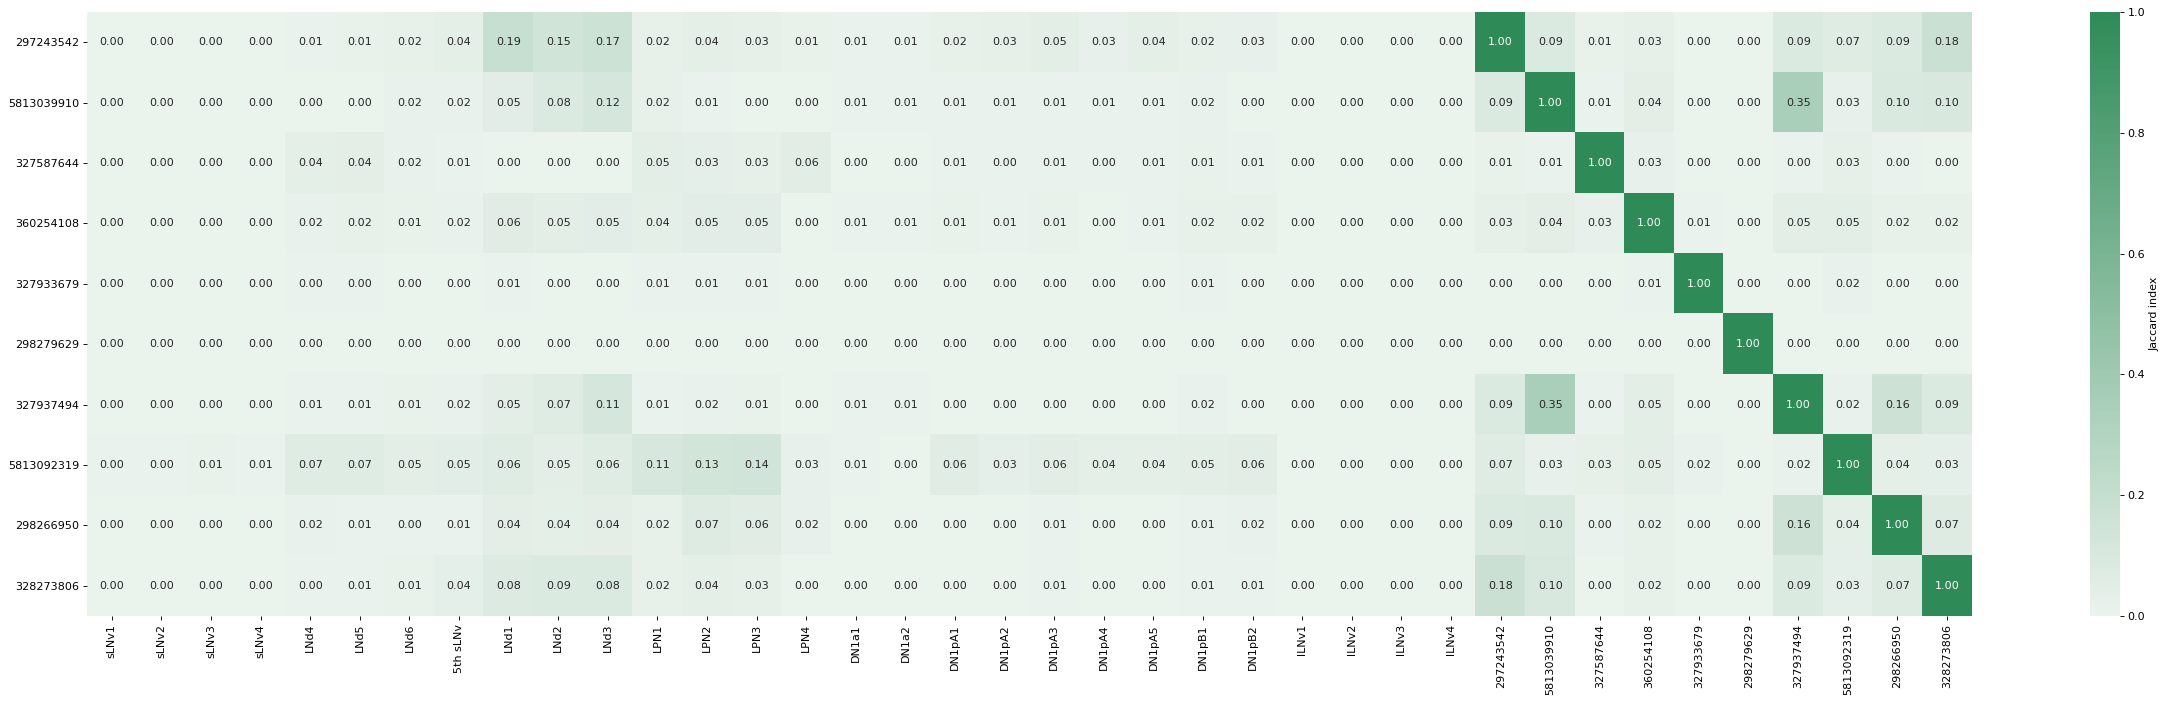

In [48]:
candidate_jaccard_out = jaccard_vis(conn_df, clock_df, clock_df['bodyId'], 'out', other_body_ids = candidate_IDs)

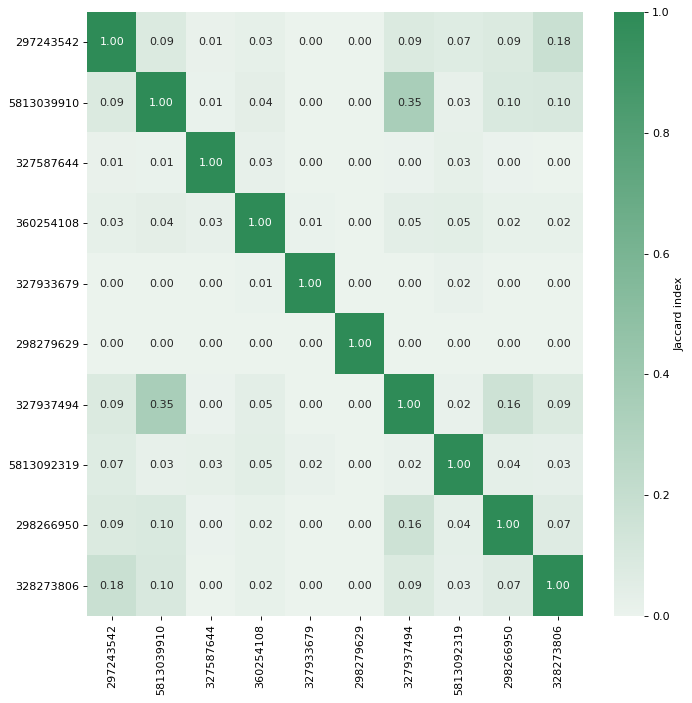

In [49]:
from visualization_utils import jaccard_simple
candidate_jac_out, fig = jaccard_simple(candidate_IDs, candidate_IDs, 'out', diag_mask=False)

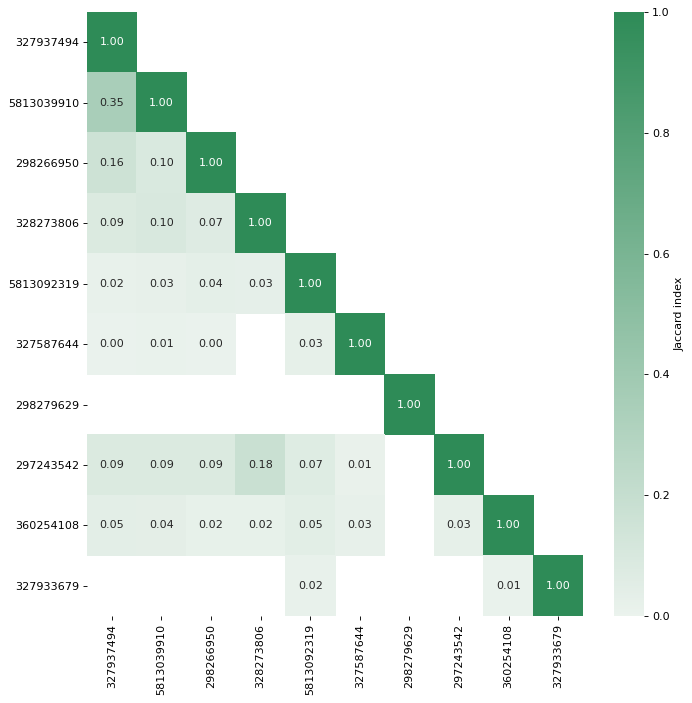

In [50]:
# clustering by hand
candidate_IDs = candidate_IDs.reset_index(drop=True)
#clustered_Ids = candidate_IDs[[0,9,1,6,8,7,3,2,4,5]]
clustered_Ids = candidate_IDs[[6,1,8,9,7,2,5,0,3,4]]

from visualization_utils import jaccard_simple
candidate_jac_out, fig = jaccard_simple(clustered_Ids, clustered_Ids, 'out', diag_mask=True)

In [51]:
# save figure
fig.savefig('jaccard_E3_target_outputs.svg')

The strong shared targets of E3 that return to the clock (with medium or strong connections) are found below. 

In [52]:
# get connections from strong shared targets of E3 to clock neurons
all_candidate_IDs = Evening3_targs['bodyId_post']
all_candidate_targets = get_input_output_conns(all_candidate_IDs, 'out', min_strength = 3)
all_candidate_targets = all_candidate_targets[all_candidate_targets.bodyId_post.isin(clock_df['bodyId'])]

In [53]:
# merge clock labels onto all_candidate_targets
all_candidate_targets = all_candidate_targets.merge(clock_df[['bodyId','labels']], left_on='bodyId_post', right_on='bodyId')
#remove parenthetical addendums to target instance names
all_candidate_targets['instance_pre'] = all_candidate_targets['instance_pre'].str.replace(r'\([^()]*\)', '')
# remove _L and _R from candidate target instance names
all_candidate_targets['instance_pre'] = [re.sub(r'_(L|R)','',str(x)) for x in all_candidate_targets['instance_pre']]
# drop extra bodyId column
all_candidate_targets = all_candidate_targets.drop(columns='bodyId')

<ipython-input-53-c14192aa3d57>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  all_candidate_targets['instance_pre'] = all_candidate_targets['instance_pre'].str.replace(r'\([^()]*\)', '')


In [54]:
# just to see the cell types of the candidates
all_candidate_targets.sort_values(by='instance_pre')

,bodyId_pre,instance_pre,bodyId_post,instance_post,weight,labels
13,297230760,5-HTPMPD01,296544364,LNd_R,3,LNd1
5,328273806,SMP226,5813064789,LNd_R,31,LNd3
8,328273806,SMP226,448260940,LNd_R,17,LNd2
11,328273806,SMP226,296544364,LNd_R,7,LNd1
1,297243542,SMP335,5813056917,LNd_R,3,LNd4
6,297243542,SMP335,5813064789,LNd_R,28,LNd3
9,297243542,SMP335,448260940,LNd_R,17,LNd2
12,297243542,SMP335,296544364,LNd_R,53,LNd1
0,5813092319,SMP346,5813056917,LNd_R,5,LNd4
2,5813092319,SMP346,5813021192,LNd_R,4,LNd5


In [55]:
# recreate labels for candidates to include type and bodyId
all_candidate_targets['candidate_label'] = all_candidate_targets['instance_pre'] + ' (' + all_candidate_targets['bodyId_pre'].map(str) + ')'
all_candidate_targets.sort_values(by='candidate_label')

,bodyId_pre,instance_pre,bodyId_post,instance_post,weight,labels,candidate_label
13,297230760,5-HTPMPD01,296544364,LNd_R,3,LNd1,5-HTPMPD01 (297230760)
5,328273806,SMP226,5813064789,LNd_R,31,LNd3,SMP226 (328273806)
8,328273806,SMP226,448260940,LNd_R,17,LNd2,SMP226 (328273806)
11,328273806,SMP226,296544364,LNd_R,7,LNd1,SMP226 (328273806)
1,297243542,SMP335,5813056917,LNd_R,3,LNd4,SMP335 (297243542)
6,297243542,SMP335,5813064789,LNd_R,28,LNd3,SMP335 (297243542)
9,297243542,SMP335,448260940,LNd_R,17,LNd2,SMP335 (297243542)
12,297243542,SMP335,296544364,LNd_R,53,LNd1,SMP335 (297243542)
0,5813092319,SMP346,5813056917,LNd_R,5,LNd4,SMP346 (5813092319)
2,5813092319,SMP346,5813021192,LNd_R,4,LNd5,SMP346 (5813092319)


In [56]:
# generate pivot table for strong shared targets back to clock
all_candidate_targets = all_candidate_targets.pivot(index='candidate_label', columns='labels', values='weight')
all_candidate_targets

labels,LNd1,LNd2,LNd3,LNd4,LNd5,LPN2,LPN3
candidate_label,,,,,,,
5-HTPMPD01 (297230760),3.0,NaN,NaN,NaN,NaN,NaN,NaN
SMP226 (328273806),7.0,17.0,31.0,NaN,NaN,NaN,NaN
SMP335 (297243542),53.0,17.0,28.0,3.0,NaN,NaN,NaN
SMP346 (5813092319),NaN,NaN,NaN,5.0,4.0,3.0,3.0
pC1b (267214250),NaN,5.0,11.0,NaN,NaN,NaN,NaN


In [57]:
# export table
all_candidate_targets.to_csv('E3_targets_to_clock.csv')

# Regional Breakdown

We're interested in exploring what regions of the brain are innervated by the various clock groups. Where the main body of the cell being innervated came from did not matter so much as the region each individual synapse is in. First, the morning cells' had the following regional output breakdown:

In [58]:
from neuprint import fetch_adjacencies

neurons_df, conns_df = fetch_adjacencies(MIds, None, min_total_weight = 3)

In [59]:
conns_df = conns_df.merge(clock_df[['bodyId', 'labels']], left_on = 'bodyId_pre', right_on = 'bodyId')
output_by_region = pd.pivot_table(conns_df, values = 'weight', index = 'roi', columns = 'labels', fill_value = 0, aggfunc = 'sum')
output_by_region

labels,sLNv1,sLNv2,sLNv3,sLNv4
roi,,,,
AME(R),0,1,0,0
NotPrimary,7,5,8,12
PLP(R),22,21,23,17
PVLP(R),0,1,0,0
SLP(R),253,322,356,259
SMP(R),71,59,36,51


In [60]:
# export table
output_by_region.to_csv('morning_mediumstrong_output.csv')

And had inputs from the following regions

In [61]:
neurons_df, conns_df = fetch_adjacencies(None, MIds, min_total_weight = 3)
conns_df = conns_df.merge(clock_df[['bodyId', 'labels']], left_on = 'bodyId_post', right_on = 'bodyId')
input_by_region = pd.pivot_table(conns_df, values = 'weight', index = 'roi', columns = 'labels', fill_value = 0, aggfunc = 'sum')
input_by_region

labels,sLNv1,sLNv2,sLNv3,sLNv4
roi,,,,
AME(R),38,45,46,37
NotPrimary,3,2,6,1
PLP(R),3,7,7,3
PVLP(R),13,19,15,19
SLP(R),16,9,21,15
SMP(R),1,3,5,1


In [62]:
# export table
input_by_region.to_csv('morning_mediumstrong_input.csv')

Doing the same for the outputs and inputs of evening cells yields the following:

In [63]:
EIds = clock_df[clock_df['phase']=='evening']['bodyId']

In [64]:
neurons_df, conns_df = fetch_adjacencies(EIds, None, min_total_weight = 3)
conns_df = conns_df.merge(clock_df[['bodyId', 'labels']], left_on = 'bodyId_pre', right_on = 'bodyId')
output_by_region = pd.pivot_table(conns_df, values = 'weight', index = 'roi', columns = 'labels', fill_value = 0, aggfunc = 'sum')
output_by_region

labels,5th sLNv,LNd1,LNd2,LNd3,LNd4,LNd5,LNd6
roi,,,,,,,
AME(R),125,0,0,0,0,0,59
ICL(R),0,0,0,0,0,0,1
LO(R),0,0,0,0,0,0,7
NotPrimary,3,1,0,2,0,0,7
PLP(R),197,0,0,0,1,1,201
PVLP(R),5,0,0,0,0,0,1
SCL(R),1,0,0,0,0,0,0
SIP(R),0,1,0,0,0,0,0
SLP(R),245,2,5,3,25,28,115


In [65]:
# export table
output_by_region.to_csv('evening_mediumstrong_output.csv')

In [66]:
neurons_df, conns_df = fetch_adjacencies(None, EIds, min_total_weight = 3)
conns_df = conns_df.merge(clock_df[['bodyId', 'labels']], left_on = 'bodyId_post', right_on = 'bodyId')
input_by_region = pd.pivot_table(conns_df, values = 'weight', index = 'roi', columns = 'labels', fill_value = 0, aggfunc = 'sum')
input_by_region

labels,5th sLNv,LNd1,LNd2,LNd3,LNd4,LNd5,LNd6
roi,,,,,,,
AME(R),456,0,0,0,0,0,273
ICL(R),0,0,0,0,0,0,1
LO(R),0,0,0,0,0,0,19
ME(R),2,0,0,0,0,0,2
NotPrimary,27,1,2,0,0,2,21
PLP(R),460,0,0,0,123,82,719
PVLP(R),6,0,0,0,0,0,5
SCL(R),4,0,0,0,11,11,1
SIP(R),0,30,25,4,0,0,0


In [67]:
# export table
input_by_region.to_csv('evening_mediumstrong_input.csv')